In [4]:
import pandas as pd
import chardet
# Read the file in binary mode
with open("EnergyData.csv", 'rb') as file:
    rawdata = file.read()

# Use result to find encoding for csv reading
result = chardet.detect(rawdata)
#print(result)

In [5]:
def state_to_region(state_name):
    state_region_mapping = {
        # Northeast
        'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
        'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
        'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',

        # Midwest
        'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest',
        'Ohio': 'Midwest', 'Wisconsin': 'Midwest', 'Iowa': 'Midwest', 
        'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest', 
        'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',

        # South
        'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South', 
        'Maryland': 'South', 'North Carolina': 'South', 'South Carolina': 'South', 
        'Virginia': 'South', 'West Virginia': 'South', 'Washington, D.C.': 'South', 
        'Alabama': 'South', 'Kentucky': 'South', 'Mississippi': 'South', 
        'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 
        'Oklahoma': 'South', 'Texas': 'South',

        # West
        'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West', 
        'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West', 
        'Utah': 'West', 'Wyoming': 'West', 'Alaska': 'West', 
        'California': 'West', 'Hawaii': 'West', 'Oregon': 'West', 
        'Washington': 'West'
    }
    return state_region_mapping.get(state_name, 'US Territory')

In [8]:
energy = pd.read_csv("EnergyData.csv", encoding='UTF-16', delimiter = "\t")
energy.head()

,State,Measure,Sector,Year of Year,Pivot Field Values
0,United States,Energy consumption (trillion Btu),Electric,2021,36703.571
1,United States,Energy consumption (trillion Btu),Industrial,2021,32497.745
2,United States,Energy consumption (trillion Btu),Commercial,2021,17422.953
3,United States,Energy consumption (trillion Btu),Residential,2021,20807.969
4,United States,Energy consumption (trillion Btu),Transportation,2021,27071.527


/var/folders/jl/kkh608tn0k194f6cv0bwbqp80000gn/T/ipykernel_74363/370118890.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/jl/kkh608tn0k194f6cv0bwbqp80000gn/T/ipykernel_74363/370118890.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


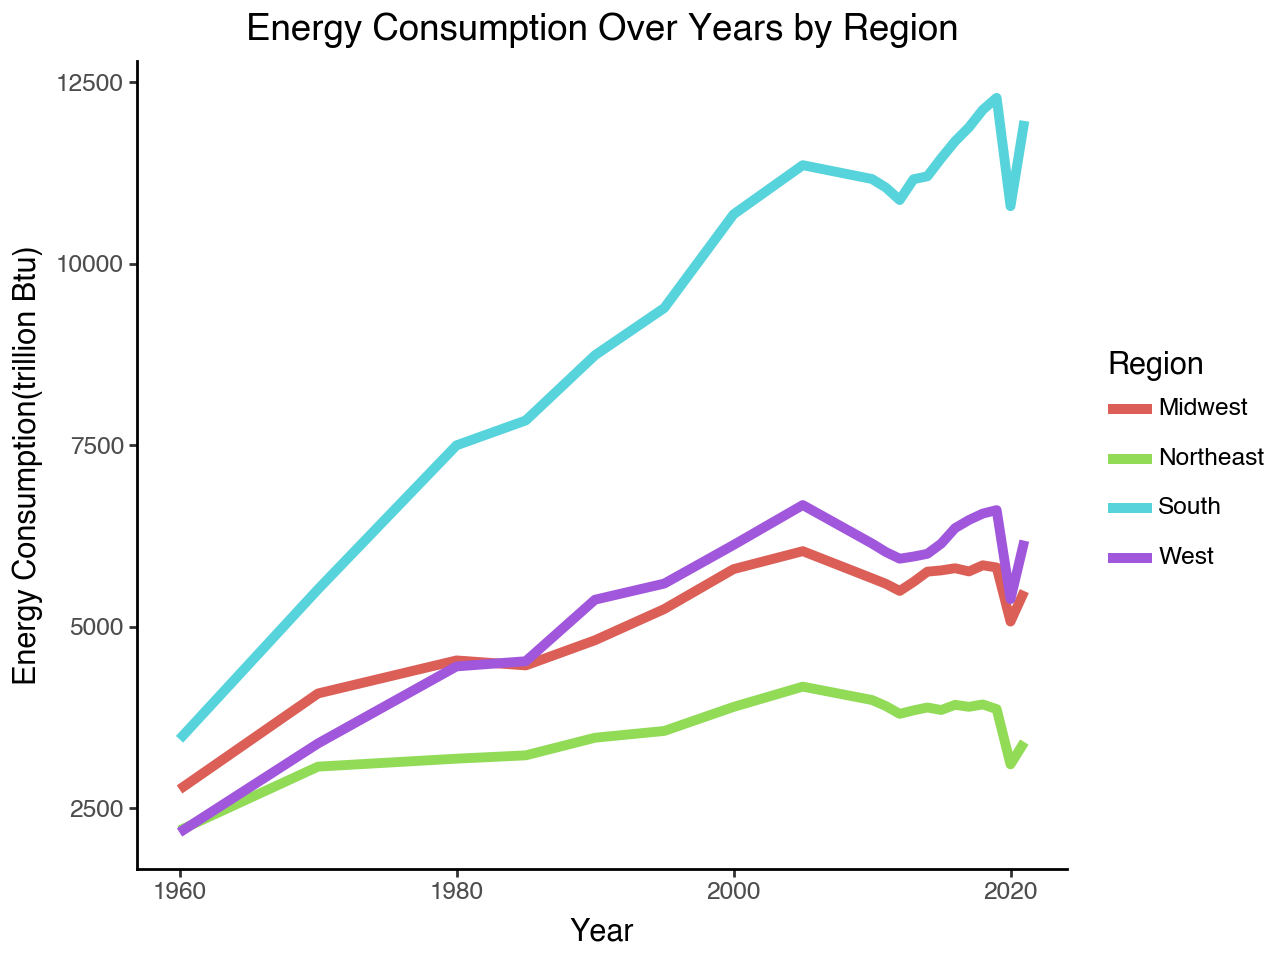

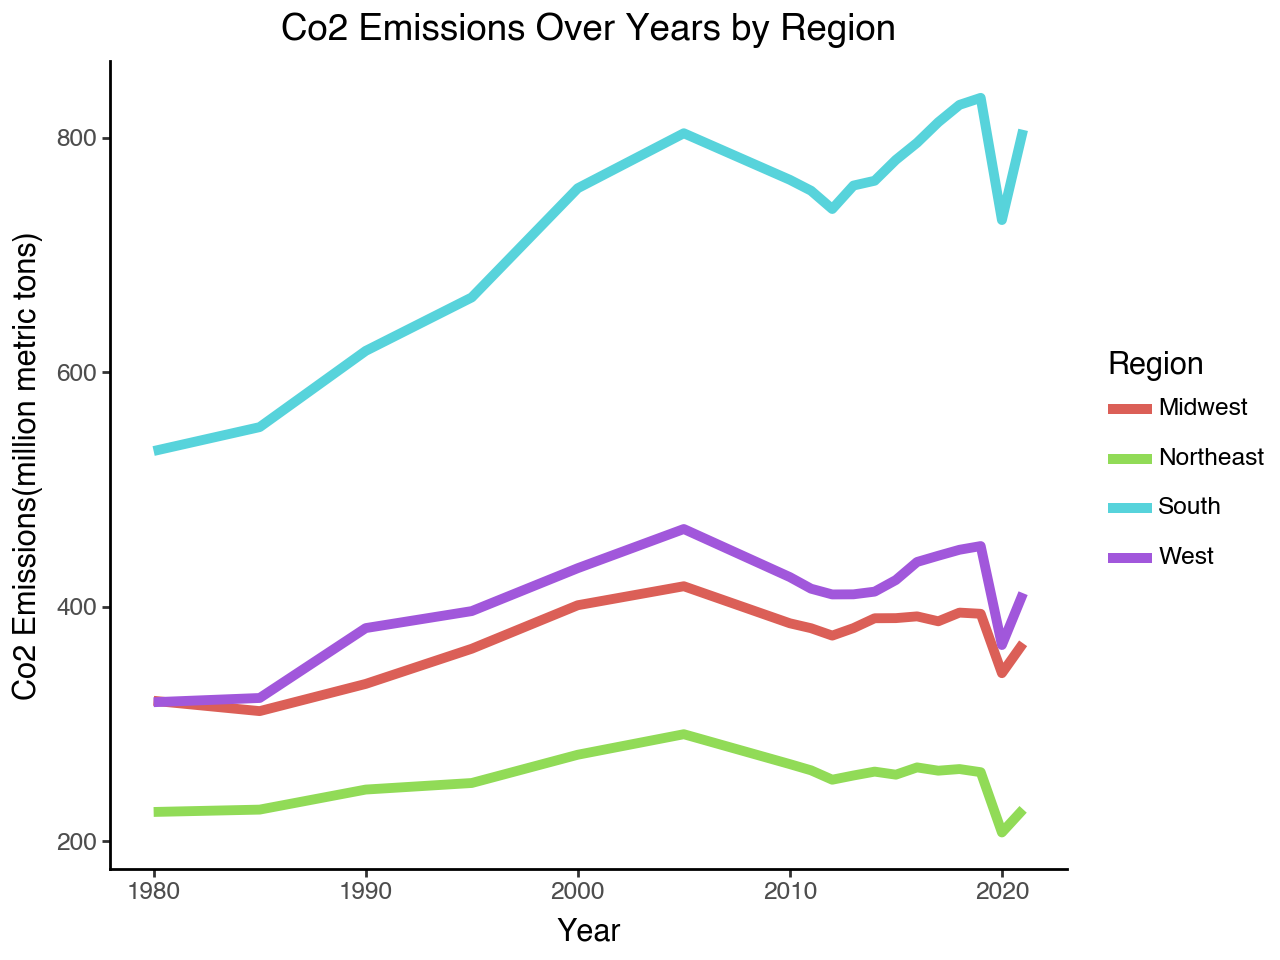

In [9]:
from plotnine import ggplot, geom_line, aes, labs, theme_classic

# Get transportation sector only
transport_energy = energy[energy["Sector"] == "Transportation"]

# Group by State, Year, and Measure
grouped_transport_energy = transport_energy.groupby(["State", 'Year of Year', 'Measure']).sum("Pivot Field Values").reset_index()

# Separate into energy consumption and co2 emmision data frames
grouped_transport_energy_consm = grouped_transport_energy[grouped_transport_energy['Measure'] == "Energy consumption (trillion Btu)"]
grouped_transport_energy_co2 = grouped_transport_energy[grouped_transport_energy['Measure'] == "Carbon dioxide emissions (million metric tons)"]

# Create Region for plotting
grouped_transport_energy_consm["Region"] = grouped_transport_energy_consm["State"].apply(state_to_region)
grouped2_transport_energy_consm = grouped_transport_energy_consm.groupby(["Region", "Year of Year"]).sum("Pivot Field Values").reset_index()
grouped3_transport_energy_consm = grouped2_transport_energy_consm[grouped2_transport_energy_consm["Region"] != "US Territory"]

# Plot energy consumption through the years by region
energy_consumption_plot = (ggplot(grouped3_transport_energy_consm, aes(x= "Year of Year", y= "Pivot Field Values", color= "Region"))
+ geom_line(size= 2)
+ labs(title="Energy Consumption Over Years by Region", x= "Year", y= "Energy Consumption(trillion Btu)")
+ theme_classic())

# Repeate last two steps for co2 emmisions
grouped_transport_energy_co2["Region"] = grouped_transport_energy_co2["State"].apply(state_to_region)
grouped2_transport_energy_co2 = grouped_transport_energy_co2.groupby(["Region", "Year of Year"]).sum("Pivot Field Values").reset_index()
grouped3_transport_energy_co2 = grouped2_transport_energy_co2[grouped2_transport_energy_co2["Region"] != "US Territory"]

co2_consumption_plot = (ggplot(grouped3_transport_energy_co2, aes(x= "Year of Year", y= "Pivot Field Values", color= "Region"))
+ geom_line(size= 2)
+ labs(title="Co2 Emissions Over Years by Region", x= "Year", y= "Co2 Emissions(million metric tons)")
+ theme_classic())

energy_consumption_plot.show()
co2_consumption_plot.show()

By the above two graphs we can see how energy consumption and co2 emissions have increased over the last 40 years.

In [11]:
revenue = pd.read_csv("RevenueData.csv", encoding='UTF-16', delimiter = "\t")
revenue.head()

,State,Government,Mode,Type,Year,Amount (thousands)
0,United States,Local,Total,Expenditure,2021,2219366293
1,United States,Local,Total,Revenue,2021,2395164866
2,United States,Local,Total,Expenditure,2020,2146665654
3,United States,Local,Total,Revenue,2020,2153395786
4,United States,Local,Total,Expenditure,2019,2071700319


In [12]:
commute = pd.read_csv("CommuteData.csv", encoding='UTF-16', delimiter = "\t")
commute.head()

,State,Mode,Year,Commute mode share (percent)
0,United States,Bicycle,2022,0.004554
1,United States,Walked,2022,0.024008
2,United States,"Taxi, motorcycle, or other",2022,0.015383
3,United States,Public transportation,2022,0.031219
4,United States,Worked at home,2022,0.151838
